# CLUSTERIZAÇÃO VARIÁVEIS SINTÉTICAS DE NÍVEL DE DESENVOLVIMENTO DO MUNICÍPIO

CNAE_FISCAL_PRINCIPAL - MUNICÍPIO - MATURIDADE_MUN

In [1]:
import pandas as pd
df = pd.read_csv('df_final_cp.csv')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO
0,2023,4712100,3849
1,2023,4321500,5453
2,2023,8599604,8877
3,2023,4617600,9051
4,2023,8230001,7225
...,...,...,...
56520613,1901,8411600,3473
56520614,1899,6462000,7107
56520615,1893,8413200,4123
56520616,1891,1321900,4675


In [2]:
# CRIANDO A COLUNA 'ANO1' COM O VALOR MAIS ANTIGO (MIN) DE ANO DE ABERTURA DE CNAE_FISCAL_PRINCIPAL POR MUNICÍPIO:
df['ANO1'] = df.groupby('MUNICÍPIO')['DATA_DE_INÍCIO_ATIVIDADE'].transform('min')
df = df.sort_values('ANO1')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,ANO1
56520617,1696,4774100,4733,1696
41386830,2004,2229399,4733,1696
12265719,2020,1821100,4733,1696
47652885,1994,5320202,4733,1696
5451152,2022,4723700,4733,1696
...,...,...,...,...
3158267,2022,4771701,320,1997
44966890,1998,8800600,120,1997
7508654,2021,4712100,120,1997
31069208,2012,9492800,176,1997


In [3]:
# MATURIDADE_CP
# MATURIDADE_MUN

# Criando a variável maturidade para os CNAE_FISCAL_PRINCIPAL:
# df['MATURIDADE_CP'] = df['ANO'] - df['ANO1']
df['DATA_DE_INÍCIO_ATIVIDADE'] = df['DATA_DE_INÍCIO_ATIVIDADE'].astype(int)
df['ANO1'] = df['ANO1'].astype(int)
df['MATURIDADE_CP'] = df['DATA_DE_INÍCIO_ATIVIDADE'] - df['ANO1']

# Agrupar por município e encontrar o maior valor de maturidade em cada grupo para termos a MATURIDADE_MUN

maturidade_mun = df.groupby('MUNICÍPIO')['MATURIDADE_CP'].max()

# Converter a série em DataFrame
df_maior_maturidade = pd.DataFrame({'MUNICÍPIO': maturidade_mun.index,
                                    'MATURIDADE_MUN': maturidade_mun.values})

# Mesclar o DataFrame original com o DataFrame da menor maturidade
df = pd.merge(df, df_maior_maturidade, on='MUNICÍPIO', how='left')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,ANO1,MATURIDADE_CP,MATURIDADE_MUN
0,1696,4774100,4733,1696,0,327
1,2004,2229399,4733,1696,308,327
2,2020,1821100,4733,1696,324,327
3,1994,5320202,4733,1696,298,327
4,2022,4723700,4733,1696,326,327
...,...,...,...,...,...,...
56520613,2022,4771701,320,1997,25,26
56520614,1998,8800600,120,1997,1,26
56520615,2021,4712100,120,1997,24,26
56520616,2012,9492800,176,1997,15,26


In [4]:
# colocar em ordem decrescnete
# Ordenar o DataFrame pela coluna 'MATURIDADE_CP' em ordem decrescente
df_sorted = df.sort_values(by='DATA_DE_INÍCIO_ATIVIDADE', ascending=False)
df_sorted

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,ANO1,MATURIDADE_CP,MATURIDADE_MUN
28260309,2023,4729699,6969,1950,73,73
46342747,2023,9602501,3195,1966,57,57
21553441,2023,4744099,7667,1940,83,83
46342726,2023,8291100,5371,1966,57,57
46342728,2023,8599699,2223,1966,57,57
...,...,...,...,...,...,...
7963494,1901,9900800,8801,1901,0,122
5800025,1899,6462000,7107,1899,0,124
1280375,1893,8413200,4123,1893,0,130
216231,1891,1321900,4675,1891,0,132


In [5]:
df = df.drop(['DATA_DE_INÍCIO_ATIVIDADE', 'ANO1', 'MATURIDADE_CP'], axis=1)
df

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,MATURIDADE_MUN
0,4774100,4733,327
1,2229399,4733,327
2,1821100,4733,327
3,5320202,4733,327
4,4723700,4733,327
...,...,...,...
56520613,4771701,320,26
56520614,8800600,120,26
56520615,4712100,120,26
56520616,9492800,176,26


In [6]:
dados_cluster = df[['CNAE_FISCAL_PRINCIPAL', 'MUNICÍPIO', 'MATURIDADE_MUN']]
dados_cluster

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,MATURIDADE_MUN
0,4774100,4733,327
1,2229399,4733,327
2,1821100,4733,327
3,5320202,4733,327
4,4723700,4733,327
...,...,...,...
56520613,4771701,320,26
56520614,8800600,120,26
56520615,4712100,120,26
56520616,9492800,176,26


In [7]:
# Realize a amostragem aleatória simples com 0,01% dos dados
dados_cluster = dados_cluster.sample(frac=0.0001, random_state=42)
dados_cluster

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,MATURIDADE_MUN
40516950,3329501,7471,58
46647478,4543900,8045,57
40083955,9609204,301,58
43535496,4744099,1005,58
25285018,4520002,7075,77
...,...,...,...
13669561,5912099,3105,122
39108389,7490103,3413,58
23011088,7911200,2493,80
44680783,4399103,4595,57


In [8]:
# Converter as colunas "MUNICÍPIO" e "CNAE_FISCAL_PRINCIPAL" em string
dados_cluster["MUNICÍPIO"] = dados_cluster["MUNICÍPIO"].astype(str)
dados_cluster["CNAE_FISCAL_PRINCIPAL"] = dados_cluster["CNAE_FISCAL_PRINCIPAL"].astype(str)

# Agrupar o DataFrame pelos campos desejados
grupo = dados_cluster.groupby(["MATURIDADE_MUN", "MUNICÍPIO", "CNAE_FISCAL_PRINCIPAL"]).size().reset_index(name="Contagem")

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_cluster_scaled = scaler.fit_transform(grupo)

pca = PCA(n_components=2)  # k é o número de componentes principais desejados
X = pca.fit_transform(dados_cluster_scaled)

componentes_principais = pca.components_
variancia_explicada = pca.explained_variance_ratio_


Número de clusters encontrados: 5


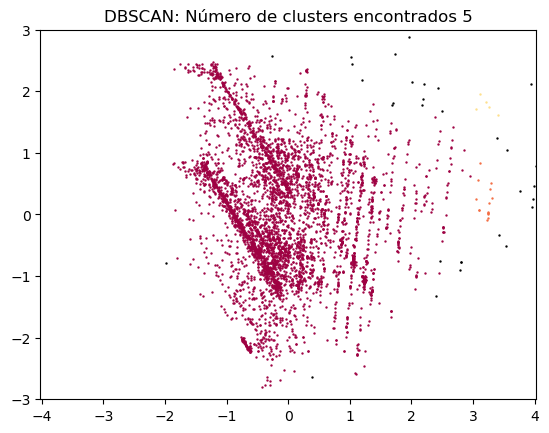

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Aplicando o DBSCAN
eps = 0.3  # Parâmetro de distância máxima entre os pontos do mesmo cluster
min_samples = 5  # Número mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Obtendo a quantidade de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Criando um gráfico colorido dos clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído é exibido em preto
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=0.5)

plt.title('DBSCAN: Número de clusters encontrados {}'.format(n_clusters))

# Centralizar o gráfico na origem
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()
